In [ ]:
!pip uninstall -y gymnasium dopamine-rl
!pip install gymnasium==0.29.1 stable-baselines3==2.3.2 --quiet


Found existing installation: gymnasium 1.2.0
Uninstalling gymnasium-1.2.0:
  Successfully uninstalled gymnasium-1.2.0
Found existing installation: dopamine_rl 4.1.2
Uninstalling dopamine_rl-4.1.2:
  Successfully uninstalled dopamine_rl-4.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
import imageio


# Initialize Environment

In [ ]:
env = gym.make("CartPole-v1", render_mode="rgb_array")  # create environment


We create the CartPole‑v1 environment with frame rendering enabled so we can capture video later.

## Create & Train DQN Agent

In [ ]:
import os
log_dir = "./logs_cartpole"
os.makedirs(log_dir, exist_ok=True)


In [ ]:
from stable_baselines3.common.monitor import Monitor
import gymnasium as gym

# Environment wrapped with Monitor so it writes *monitor.csv inside log_dir
env = Monitor(
    gym.make("CartPole-v1", render_mode="rgb_array"),
    log_dir
)


In [ ]:
from stable_baselines3 import DQN

model = DQN(
    policy="MlpPolicy",
    env=env,
    learning_rate=1e-3,
    buffer_size=50_000,
    learning_starts=1_000,
    batch_size=64,
    gamma=0.99,
    target_update_interval=500,
    train_freq=4,
    exploration_fraction=0.1,
    exploration_final_eps=0.02,
    verbose=1
)

model.learn(total_timesteps=10_000)   # أعد التدريب 10 آلاف خطوة فقط
model.save("dqn_cartpole")            # احفظ الوكيل لو أحببت


Using cuda device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.5     |
|    ep_rew_mean      | 23.5     |
|    exploration_rate | 0.908    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 6232     |
|    time_elapsed     | 0        |
|    total_timesteps  | 94       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.9     |
|    ep_rew_mean      | 24.9     |
|    exploration_rate | 0.805    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 8658     |
|    time_elapsed     | 0        |
|    total_timesteps  | 199      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.5     |
|    ep_rew_mean      | 23.5     |
|    exploration_rate | 0.724    |
| 

MlpPolicy uses a feed‑forward neural net to approximate Q‑values.

learn() runs 10 000 environment steps (~2 min on CPU).

We then save the model.

## Evaluate Agent

In [ ]:
mean_r, std_r = evaluate_policy(model, env, n_eval_episodes=10, render=False)
print(f"Mean reward over 10 episodes: {mean_r:.1f} ± {std_r:.1f}")


Mean reward over 10 episodes: 145.7 ± 11.4


## Record Video

In [ ]:
frames = []
obs, _ = env.reset()
done = False
while not done:
    frames.append(env.render())               # store current frame
    action, _state = model.predict(obs)       # choose best action
    obs, _, done, truncated, _ = env.step(action)
    done = done or truncated

import imageio
imageio.mimsave("cartpole_agent.mp4", frames, fps=30)
print("🎬 Saved to cartpole_agent.mp4")


🎬 Saved to cartpole_agent.mp4


Collect frames while the trained agent balances the pole, then save them as an MP4 file.

## Plot Learning Curve

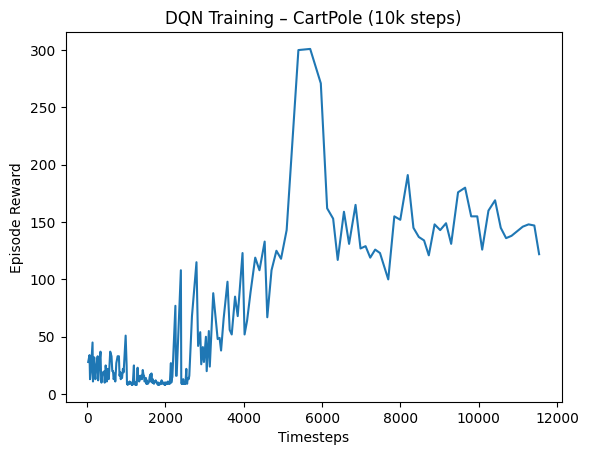

In [ ]:
import matplotlib.pyplot as plt
from stable_baselines3.common.results_plotter import load_results, ts2xy

data = load_results(log_dir)          # يقرأ monitor.csv من المجلد
x, y = ts2xy(data, "timesteps")       # x=خطوات التدريب، y=مكافأة الحلقة
plt.plot(x, y)
plt.xlabel("Timesteps")
plt.ylabel("Episode Reward")
plt.title("DQN Training – CartPole (10k steps)")
plt.show()


# LunarLander – DQN Full Pipeline

In [ ]:

!apt-get install -y swig


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 1s (790 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubunt

In [ ]:
# ✅ 2. حذف أي نسخة سابقة (اختياري ولكن آمن)
!pip uninstall -y Box2D box2d-py


In [ ]:
# ✅ 3. إعادة تثبيت gymnasium مع box2d support
!pip install "gymnasium[box2d]" --no-cache-dir


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 127.8 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp311-cp311-linux_x86_64.whl size=2351230 sha256=88d3a5062c5d0839b9740f20953e451b32aa3a15e15c2b3d36c2db30619a47ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-uj94fjdl/wheels/ab/f1/0c/d56f4a2bdd12bae0a0693ec33f2f0daadb5eb9753c78fa5308
Successfully built box2d-py


Using cuda device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.8     |
|    ep_rew_mean      | -159     |
|    exploration_rate | 0.681    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4371     |
|    time_elapsed     | 0        |
|    total_timesteps  | 391      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 102      |
|    ep_rew_mean      | -122     |
|    exploration_rate | 0.335    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 4451     |
|    time_elapsed     | 0        |
|    total_timesteps  | 814      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.9     |
|    ep_rew_mean      | -117     |
|    exploration_rate | 0.0404   |
| 

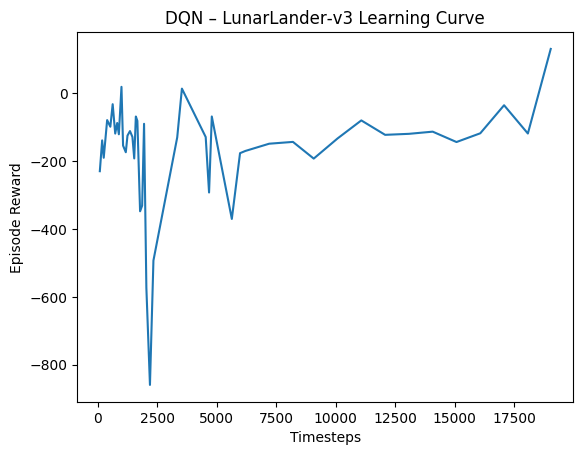

🎬 Saved to lunarlander_agent.mp4


In [ ]:
# -------------------------------------------------
# 1) Imports & Monitor‑wrapped LunarLander‑v3 env
# -------------------------------------------------
import os, imageio, numpy as np, gymnasium as gym
from stable_baselines3.common.monitor import Monitor
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
from stable_baselines3.common.results_plotter import load_results, ts2xy

log_dir = "./logs_lander"
os.makedirs(log_dir, exist_ok=True)

# Use the up‑to‑date environment version v3
env = Monitor(
    gym.make("LunarLander-v2", render_mode="rgb_array"),
    log_dir
)

# -------------------------------------------------
# 2) Build & train DQN agent
# -------------------------------------------------
model = DQN(
    "MlpPolicy",
    env,
    learning_rate      = 1e-3,
    buffer_size        = 100_000,
    learning_starts    = 2_000,
    batch_size         = 64,
    gamma              = 0.99,
    target_update_interval = 1_000,
    train_freq         = 4,
    exploration_fraction = 0.12,
    exploration_final_eps = 0.02,
    verbose=1
)

model.learn(total_timesteps=10_000)     # train 10k steps
model.save("dqn_lunar")                 # save trained agent

# -------------------------------------------------
# 3) Evaluate the agent
# -------------------------------------------------
mean_r, std_r = evaluate_policy(model, env, n_eval_episodes=10, render=False)
print(f"Mean reward over 10 episodes: {mean_r:.1f} ± {std_r:.1f}")

# -------------------------------------------------
# 4) Plot learning curve
# -------------------------------------------------
data = load_results(log_dir)
x, y = ts2xy(data, "timesteps")
plt.plot(x, y)
plt.xlabel("Timesteps"); plt.ylabel("Episode Reward")
plt.title("DQN – LunarLander‑v3 Learning Curve")
plt.show()

# -------------------------------------------------
# 5) Record one episode to MP4 video
# -------------------------------------------------
frames = []
obs, _ = env.reset()
done = False
while not done:
    frames.append(env.render())                             # capture frame
    action, _ = model.predict(obs, deterministic=True)      # best action
    obs, _, done, truncated, _ = env.step(action)
    done = done or truncated

imageio.mimsave("lunarlander_agent.mp4", frames, fps=30)
print("🎬 Saved to lunarlander_agent.mp4")
